# <span style="color: #ffffff;background-color: #2E5077;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Anime Recommendation System</span>

### <span style="color: #ffffff;background-color: #79D7BE;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Objective</span>
#### The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Importing Libraries</span>

In [123]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('Imported')

Imported


#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Exploring Data</span>

In [124]:
df = pd.read_csv('Anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [125]:
row, columns = df.shape
print(f'Rows = {row}')
print(f'Columns = {columns}')

Rows = 12294
Columns = 7


In [126]:
## getting the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [127]:
## checking if the name are in proper format
df.name.unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [128]:
## checkin number of movies in dataset
print(f'Number of anime = {df.name.nunique()}')

Number of anime = 12292


In [129]:
## before starting, let's put all the name into a single list for better understandin
movies_name_list = []
for i in range(len(df)):
    movies_name_list.append(df.iloc[i,1])

In [130]:
## let's check the name of the dataframe
movies_name_list

['Kimi no Na wa.',
 'Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Steins;Gate',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 'Gintama&#039;: Enchousen',
 'Clannad: After Story',
 'Koe no Katachi',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Sen to Chihiro no Kamikakushi',
 'Shigatsu wa Kimi no Uso',
 'Mushishi Zoku Shou 2nd Season',
 'Ookami Kodomo no Ame to Yuki',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Mononoke Hime',
 'Suzumiya Haruhi no Shoushitsu',
 'Monogatari Series: Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo: New Challenger',
 'Mushishi Zoku Shou: Suzu no Shizuku',
 'Natsume Yuuji

In [131]:
print(f'Number of movies listed = {len(movies_name_list)}')

Number of movies listed = 12294


##### The conclusion is that we don not need to clean the name in the dataframe

In [132]:
## let's check same for genre and type
df.iloc[1,2]

'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'

In [133]:
## let's check for type
df.iloc[1,3]

'TV'

##### So, there is no need to clean these columns as well

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Data Visualization</span>

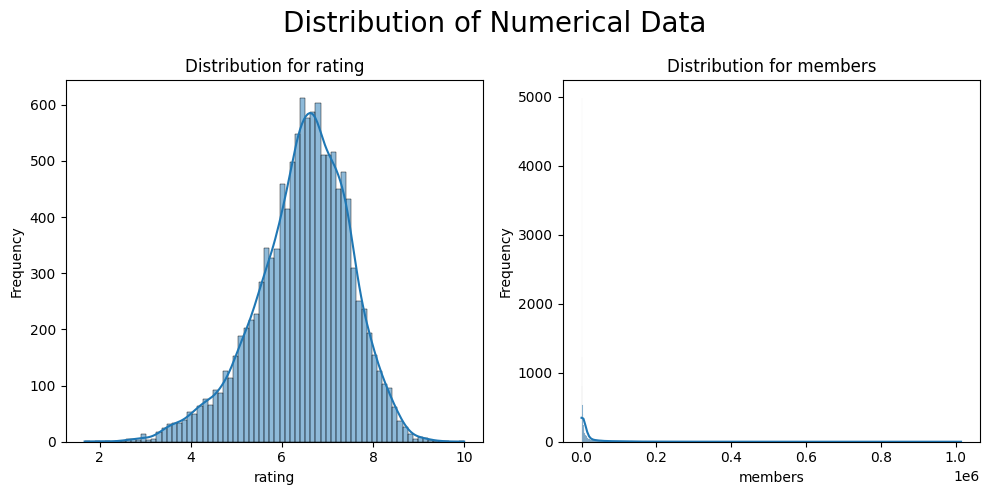

In [134]:
## finding the distribution of numerical columns ie., rating and members
plt.figure(figsize=(10,5))
plt.suptitle('Distribution of Numerical Data', fontsize=20)
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.drop(columns = 'anime_id', inplace=True)
for idx, col in enumerate(num_cols, 1):
    plt.subplot(1,2,idx)
    sns.histplot(data=num_cols, x=col, kde=True, palette='Set2')
    plt.title(f'Distribution for {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [135]:
## converting genre into a new dataframe for better vizualization
genre_watch = df.genre.value_counts()
genre_watch = pd.DataFrame(genre_watch)

In [136]:
## converting type of watch into a new dataframe for better vizualization
type_watch = df.type.value_counts()
type_watch = pd.DataFrame(type_watch)

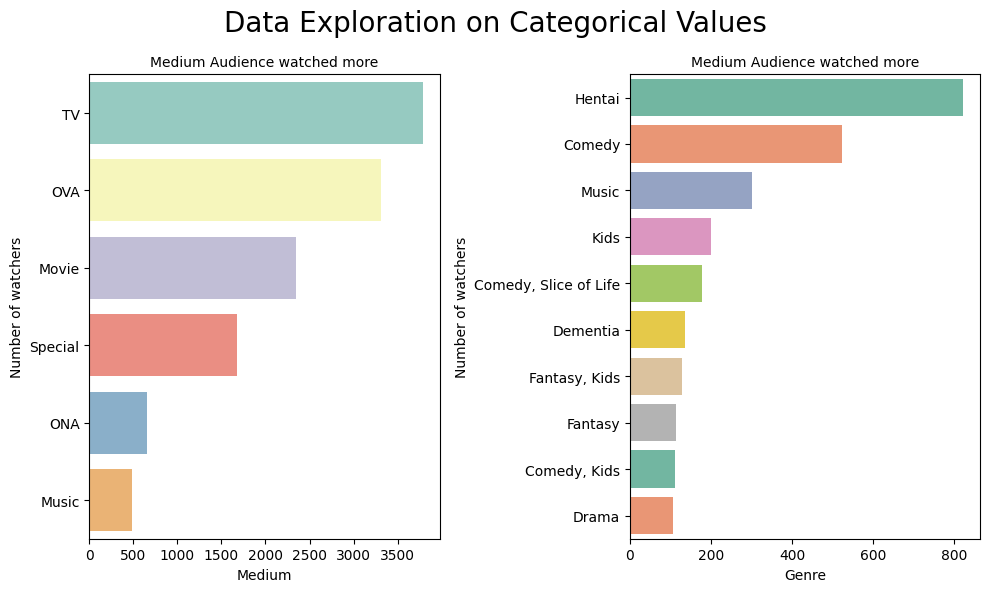

In [137]:
## let's plot on basis of categorical values
plt.figure(figsize=(10,6))
plt.suptitle('Data Exploration on Categorical Values', fontsize=20)
## let's check frequency for type, in which medium the audience is likely to watch 
plt.subplot(1,2,1)
plt.title('Medium Audience watched more', fontsize=10)
sns.barplot(data=type_watch.head(10), y = 'type', x='count',  palette='Set3')
plt.xlabel('Medium')
plt.ylabel('Number of watchers')

## let's check frequency for type, in which medium the audience is likely to watch 
plt.subplot(1,2,2)
plt.title('Medium Audience watched more', fontsize=10)
sns.barplot(data = genre_watch.head(10), y = 'genre', x='count', palette='Set2')
plt.xlabel('Genre')
plt.ylabel('Number of watchers')
plt.tight_layout()
plt.show()

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Data Pre-Processing</span>

In [138]:
## let's check for null values now
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [139]:
## there are null values present, as we can see it
## Genre, Type and Rating, and we can see that [genre and type] are two categorical columns and [rating] is numerical colum,
## so, we can fill the null values accordingly
## MODE for Categorical values and MEAN for Numerical Values
df.genre.fillna(df.genre.mode()[0], inplace=True)
df.type.fillna(df.type.mode()[0], inplace=True)
df.rating.fillna(df.rating.mean(), inplace=True)
print('Null values filled')

Null values filled


In [140]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

##### We, can now see that there is no more null values present.

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Feature Extraction</span>

In [141]:
## let's create another column with importatn features
def important_features(dataset):
    data = dataset.copy()
    for i in range(0, dataset.shape[0]):
        data["important_feature"] = data["name"] + ' ' + data["genre"] + ' ' + data['type']
    return data

In [142]:
data = important_features(df)

##### Applyed, the function to get the important feature columns, which is the combination of name, genre and type

In [143]:
## check the head of the new_dataset
data.head()

,anime_id,name,genre,type,episodes,rating,members,important_feature
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Kimi no Na wa. Drama, Romance, School, Superna..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Fullmetal Alchemist: Brotherhood Action, Adven..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Gintama° Action, Comedy, Historical, Parody, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Steins;Gate Sci-Fi, Thriller TV"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Gintama&#039; Action, Comedy, Historical, Paro..."


#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Recommendation System Implementation</span>

In [144]:
## now, we can simply vectorize the 'important feature' to a vector so that a meaningfull 
## vector will be created.
## importing vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer() ## initializing Tfidf vectorizer

In [145]:
## vectorizing the important features, with fit_transform
vecs = vec.fit_transform(data["important_feature"].apply (lambda x: np.str_(x)))

In [146]:
vecs.shape

(12294, 12133)

In [147]:
## applyting pairwise cosing function to find the simmilarity
from sklearn.metrics.pairwise import cosine_similarity
## defining a separete similarity matrix
sim = cosine_similarity(vecs)

In [148]:
sim.shape

(12294, 12294)

In [149]:
sim

array([[1.        , 0.03757743, 0.        , ..., 0.02746398, 0.02264862,
        0.05928598],
       [0.03757743, 1.        , 0.0906605 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0906605 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02746398, 0.        , 0.        , ..., 1.        , 0.82466648,
        0.05584731],
       [0.02264862, 0.        , 0.        , ..., 0.82466648, 1.        ,
        0.04605541],
       [0.05928598, 0.        , 0.        , ..., 0.05584731, 0.04605541,
        1.        ]])

In [150]:
## checking if the diagonal values gives 100
sim[4][4]

1.0

In [151]:
np.fill_diagonal(sim, 0)

In [152]:
sim_df = pd.DataFrame(sim)

In [153]:
sim_df.index = df.anime_id.unique()
sim_df.columns = df.anime_id.unique()

In [154]:
sim_df.idxmax()

32281     5643
5114      6421
28977      918
9253     30484
9969     28977
         ...  
9316      2963
5543     27387
5621      6133
6133      5621
26081    31831
Length: 12294, dtype: int64

In [155]:
df[(df['anime_id']==26081)|(df['anime_id']==31831)]

,anime_id,name,genre,type,episodes,rating,members
7716,31831,Fantasy,Hentai,Movie,1,5.12,193
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Recommendation System</span>

In [156]:
def recommend(title):
    # Retrieve the anime_id of the given title
    movie_id = data[data.name == title]["anime_id"].values[0]
    
    # Map anime_id to the correct index in the similarity matrix
    anime_index = data[data.anime_id == movie_id].index[0]
    
    # Get similarity scores for the given anime
    scores = list(enumerate(sim[anime_index]))
    
    # Sort scores in descending order
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Get the top movies excluding the input movie
    recommended_movies = [
        data.iloc[movie[0]]["name"]
        for movie in sorted_scores if data.iloc[movie[0]]["anime_id"] != movie_id
    ]
    return recommended_movies

In [157]:
def recommend_10(movie_list):
    # Return the first 10 movies using slicing
    return movie_list[:10]

In [162]:
movie_10 = recommend('Samurai 7')

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Recommendation System Test Analysis</span>

In [163]:
recommend_10(movie_10)

['Fruity Samurai',
 'Go! Samurai',
 'Samurai Champloo',
 'Afro Samurai',
 'Kushimitama Samurai',
 'Samurai',
 'Yoroiden Samurai Troopers',
 'Afro Samurai Movie',
 'Gintama°',
 'Gintama']

In [161]:
movie_10 = recommend('Gintama°')
recommend_10(movie_10)

['Gintama',
 'Gintama&#039;',
 'Gintama (2017)',
 'Gintama&#039;: Enchousen',
 'Gintama: Yorinuki Gintama-san on Theater 2D',
 'Gintama: Shinyaku Benizakura-hen',
 'Gintama Movie: Shinyaku Benizakura-hen',
 'Gintama: Jump Festa 2014 Special',
 'Samurai 7',
 'Gintama: Dai Hanseikai']

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Evaluation</span>

In [165]:
evaluation_dataset = data.copy()
evaluation_dataset.head()

,anime_id,name,genre,type,episodes,rating,members,important_feature
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"Kimi no Na wa. Drama, Romance, School, Superna..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"Fullmetal Alchemist: Brotherhood Action, Adven..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"Gintama° Action, Comedy, Historical, Parody, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"Steins;Gate Sci-Fi, Thriller TV"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"Gintama&#039; Action, Comedy, Historical, Paro..."


In [169]:
## split the dataset into training and testing 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(evaluation_dataset, test_size=0.33, random_state=42)

In [171]:
print(f'The length of the training data is {len(data_train)}')
print(f'The length of the training data is {len(data_test)}')
print(f'Total length {len(data_train) + len(data_test)}')

The length of the training data is 8236
The length of the training data is 4058
Total length 12294


In [186]:
# Define a function to get recommendations
def get_recommendations(anime_id, similarity_matrix, top_n=10):
    # Find the index of the given anime ID
    idx = df.index[df['anime_id'] == anime_id].tolist()[0]
    # Get similarity scores for this anime
    scores = similarity_matrix[idx]
    # Sort indices of scores in descending order
    recommended_indices = scores.argsort()[::-1][:top_n]
    # Get anime IDs for the top_n recommendations
    recommended_anime_ids = df.iloc[recommended_indices].anime_id.values
    return recommended_anime_ids

In [187]:
# Create dummy relevance labels for evaluation
# Relevance: 1 if recommended anime is in the same genre, 0 otherwise
def get_relevance(true_anime_id, recommended_anime_ids):
    true_genres = set(df[df['anime_id'] == true_anime_id].genre.iloc[0].split(", "))
    relevance = []
    for rec_id in recommended_anime_ids:
        rec_genres = set(df[df['anime_id'] == rec_id].genre.iloc[0].split(", "))
        relevance.append(1 if true_genres & rec_genres else 0)
    return relevance

In [188]:
# Evaluate the system
y_true, y_pred = [], []

In [190]:
for anime_id in data_test['anime_id']:
    # Get top 10 recommendations for each test anime
    recommended_ids = get_recommendations(anime_id, sim, top_n=10)
    # Get relevance labels for recommendations
    relevance = get_relevance(anime_id, recommended_ids)
    # Add to evaluation lists
    y_true.extend([1] * len(relevance))  # Ground truth: All test anime have relevance = 1
    y_pred.extend(relevance)  # Predicted relevance labels

In [191]:
# Calculate evaluation metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

In [194]:
# Print the results
from sklearn.metrics import classification_report
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Precision: 1.0
Recall: 0.8021931986200098
F1-Score: 0.8902410676438817

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89     40580

    accuracy                           0.80     40580
   macro avg       0.50      0.40      0.45     40580
weighted avg       1.00      0.80      0.89     40580



#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Evaluation</span>

#### The recommendation system achieves excellent precision (1.0), ensuring all recommended items are relevant, and a strong F1-score (0.89), reflecting a good balance between precision and recall. However, recall (0.80) indicates 20% of relevant items are missed.

#### <span style="color: #ffffff;background-color: #4DA1A9;font-size: 1.2em;font-weight: bold;padding: 8px 12px;border-radius: 6px;box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.2);texttransform: uppercase;letter-spacing: 1px;">Interview Questions</span>

### 1. Difference Between User-Based and Item-Based Collaborative Filtering
##### User-Based Collaborative Filtering: 
    Recommends items based on the preferences of similar users. It identifies users who have similar tastes and suggests items they liked.
##### Item-Based Collaborative Filtering: 
    Recommends items that are similar to those the user has interacted with or liked. It calculates item similarity based on user interactions.
##### Key Difference: User-based focuses on finding similar users, while item-based focuses on finding similar items.

### 2. What is Collaborative Filtering and How Does It Work?
##### Definition: 
    Collaborative filtering is a recommendation system technique that predicts user preferences based on the behavior and preferences of other users.
##### How It Works:
    1. Data Collection: It uses historical data such as user ratings or interactions with items.
    2. Similarity Calculation: It computes the similarity between users (user-based) or items (item-based).
    3. Recommendation Generation: It suggests items to users based on the preferences of similar users or similar items they have already interacted with.
##### Challenges: Collaborative filtering faces challenges like the cold start problem (lack of data for new users/items) and sparsity (few interactions in a large dataset).